In [1]:
%load_ext autoreload
%autoreload 2
import sys

# instead of creating a package using setup.py or building from a docker/singularity file,
# import the sister directory of src code to be called on in notebook.
# This keeps the notebook free from code to only hold visualizations and is easier to test
# It also helps keep the state of variables clean such that cells aren't run out of order with a mysterious state
sys.path.append("..")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from matplotlib import colors
import statistics as st
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [3]:
df = pd.read_csv('/home/aevans/nwp_bias/data/comet_csvs/fh4_v_fh2.csv')
df = df[:-5]

In [4]:
df

,Name,Tags,Server end time,station,forecast_hour,Duration,train_loss,test_loss,test_loss (Min),Current epoch,forecast_lead,num_layers,sequence_length,Learning Rate,Batch size
0,efficient_partridge_3079,NaN,1703035026948,HAMM,4.0,220,0.129849,0.239503,0.205288,70,0.0,5.0,120.0,0.005,10000.0
1,responsible_mule_9124,NaN,1703034766340,HAMM,2.0,222,0.142610,0.215545,0.215545,70,0.0,5.0,120.0,0.005,10000.0
2,leading_hippopotamus_4750,NaN,1703034501963,HARR,4.0,211,0.116355,0.191305,0.181128,70,0.0,5.0,120.0,0.005,10000.0
3,occupational_mackerel_8180,NaN,1703034252124,HARR,2.0,216,0.124027,0.187236,0.180552,70,0.0,5.0,120.0,0.005,10000.0
4,given_kiwano_1531,NaN,1703033994348,ESSX,4.0,238,0.092891,0.176735,0.159621,70,0.0,5.0,120.0,0.005,10000.0
5,minimum_slate_8931,NaN,1703033713010,ESSX,2.0,236,0.101121,0.174996,0.169868,70,0.0,5.0,120.0,0.005,10000.0
6,academic_impala_9638,NaN,1703033433105,JOHN,4.0,233,0.113670,0.164471,0.146685,70,0.0,5.0,120.0,0.005,10000.0
7,historical_hedgehog_5069,NaN,1703033158287,JOHN,2.0,228,0.116930,0.167894,0.160628,70,0.0,5.0,120.0,0.005,10000.0
8,developed_hadron_4000,NaN,1703032890396,YORK,4.0,193,0.047882,0.099579,0.088139,70,0.0,5.0,120.0,0.005,10000.0
9,tough_iguana_285,NaN,1703032659822,YORK,2.0,188,0.047302,0.090456,0.085445,70,0.0,5.0,120.0,0.005,10000.0


In [5]:
df2 = pd.read_csv('/home/aevans/nwp_bias/data/comet_csvs/fh10.csv')
df2 = df2[:10]
df2

,Name,Tags,Server end time,station,forecast_hour,Duration,train_loss,test_loss,test_loss (Min),Current epoch,forecast_lead,num_layers,sequence_length,Learning Rate,Batch size
0,lovely_facade_4411,NaN,1703098685924,HAMM,10.0,117,0.115087,0.226086,0.196710,70,0.0,5.0,120.0,0.005,10000.0
1,competent_asphalt_5246,NaN,1703098605245,ESSX,10.0,171,0.088137,0.229759,0.193943,70,0.0,5.0,120.0,0.005,10000.0
2,chronic_mackerel_1899,NaN,1703098536206,HARR,10.0,97,0.116903,0.193021,0.184972,70,0.0,5.0,120.0,0.005,10000.0
3,important_duck_4191,NaN,1703098510362,JOHN,10.0,119,0.105183,0.230662,0.205986,70,0.0,5.0,120.0,0.005,10000.0
4,beige_density_5504,NaN,1703098376639,YORK,10.0,147,0.055580,0.104775,0.095053,70,0.0,5.0,120.0,0.005,10000.0
5,maroon_atlas_236,NaN,1703098322409,WANT,10.0,118,0.041425,0.158881,0.088118,70,0.0,5.0,120.0,0.005,10000.0
6,premier_putty_7873,NaN,1703098282634,DOVE,10.0,101,0.082329,0.184555,0.167801,70,0.0,5.0,120.0,0.005,10000.0
7,scared_redshift_9962,NaN,1703098131062,OLEA,10.0,173,0.070307,0.148144,0.142197,70,0.0,5.0,120.0,0.005,10000.0
8,solid_constrictor_8487,NaN,1703098110753,DUAN,10.0,120,0.097589,0.284192,0.233163,70,0.0,5.0,120.0,0.005,10000.0
9,unconscious_carp_5807,NaN,1703098094044,BUFF,10.0,95,0.124417,0.183407,0.180600,70,0.0,5.0,120.0,0.005,10000.0


In [6]:
stations = df['station'].unique()

In [7]:
df = pd.concat([df, df2])

In [8]:
df

,Name,Tags,Server end time,station,forecast_hour,Duration,train_loss,test_loss,test_loss (Min),Current epoch,forecast_lead,num_layers,sequence_length,Learning Rate,Batch size
0,efficient_partridge_3079,NaN,1703035026948,HAMM,4.0,220,0.129849,0.239503,0.205288,70,0.0,5.0,120.0,0.005,10000.0
1,responsible_mule_9124,NaN,1703034766340,HAMM,2.0,222,0.142610,0.215545,0.215545,70,0.0,5.0,120.0,0.005,10000.0
2,leading_hippopotamus_4750,NaN,1703034501963,HARR,4.0,211,0.116355,0.191305,0.181128,70,0.0,5.0,120.0,0.005,10000.0
3,occupational_mackerel_8180,NaN,1703034252124,HARR,2.0,216,0.124027,0.187236,0.180552,70,0.0,5.0,120.0,0.005,10000.0
4,given_kiwano_1531,NaN,1703033994348,ESSX,4.0,238,0.092891,0.176735,0.159621,70,0.0,5.0,120.0,0.005,10000.0
5,minimum_slate_8931,NaN,1703033713010,ESSX,2.0,236,0.101121,0.174996,0.169868,70,0.0,5.0,120.0,0.005,10000.0
6,academic_impala_9638,NaN,1703033433105,JOHN,4.0,233,0.113670,0.164471,0.146685,70,0.0,5.0,120.0,0.005,10000.0
7,historical_hedgehog_5069,NaN,1703033158287,JOHN,2.0,228,0.116930,0.167894,0.160628,70,0.0,5.0,120.0,0.005,10000.0
8,developed_hadron_4000,NaN,1703032890396,YORK,4.0,193,0.047882,0.099579,0.088139,70,0.0,5.0,120.0,0.005,10000.0
9,tough_iguana_285,NaN,1703032659822,YORK,2.0,188,0.047302,0.090456,0.085445,70,0.0,5.0,120.0,0.005,10000.0


In [9]:
station_ls = []
fh2 = []
fh4 = []
fh10 = []
for s in stations:
    df1 = df[df['station']==s]
    station_ls.append(s)
    for i,_ in enumerate(df1['forecast_hour']):
        if df1['forecast_hour'].iloc[i] == 2.0:
            fh2.append(df1['test_loss (Min)'].iloc[i])
        if df1['forecast_hour'].iloc[i] == 10.0:
            fh10.append(df1['test_loss (Min)'].iloc[i])
        if df1['forecast_hour'].iloc[i] == 4.0:
            fh4.append(df1['test_loss (Min)'].iloc[i])


In [10]:
plot_df = pd.DataFrame()
plot_df['station'] = station_ls
plot_df['fh2'] = fh2
plot_df['fh4'] = fh4
plot_df['fh10'] = fh10

In [11]:
color=[]
diff = []
for i,_ in enumerate(plot_df['station']):
    diff.append((plot_df['fh2'].iloc[i] - plot_df['fh4'].iloc[i]))
    if plot_df['fh2'].iloc[i] > plot_df['fh4'].iloc[i]:
        color.append('blue')
    else:
        color.append('orange')

In [12]:
plot_df['color'] = color
plot_df['diff'] = diff

In [13]:
plot_df

,station,fh2,fh4,fh10,color,diff
0,HAMM,0.215545,0.205288,0.196710,blue,0.010257
1,HARR,0.180552,0.181128,0.184972,orange,-0.000576
2,ESSX,0.169868,0.159621,0.193943,blue,0.010247
3,JOHN,0.160628,0.146685,0.205986,blue,0.013943
4,YORK,0.085445,0.088139,0.095053,orange,-0.002693
5,WANT,0.049952,0.063093,0.088118,orange,-0.013141
6,DOVE,0.139899,0.138236,0.167801,blue,0.001663
7,BUFF,0.209414,0.214673,0.180600,orange,-0.005258
8,DUAN,0.222336,0.212614,0.233163,blue,0.009722
9,OLEA,0.110448,0.105983,0.142197,blue,0.004464


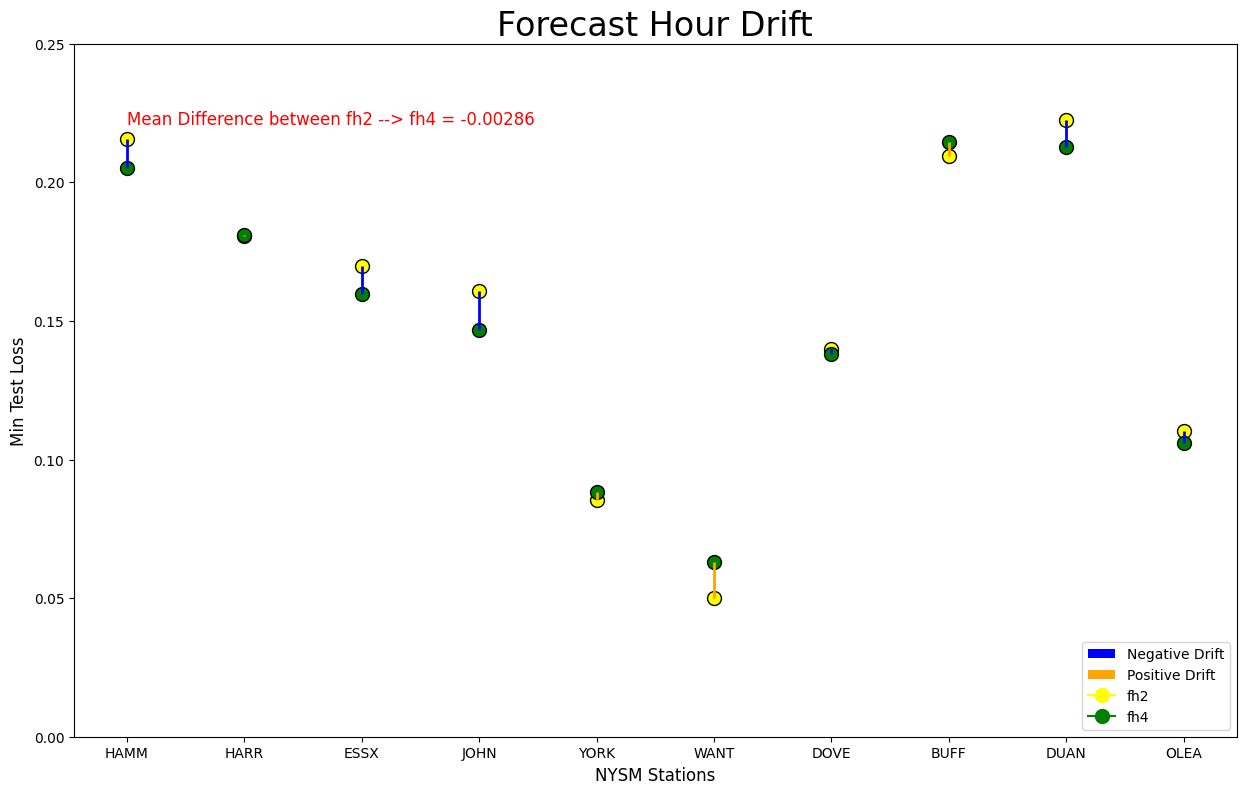

In [14]:
fig, ax = plt.subplots(figsize=(15,9))
ax.set_title('Forecast Hour Drift', fontsize=24)
ax.set_xlabel('NYSM Stations', fontsize = 12)
ax.set_ylabel('Min Test Loss',fontsize = 12)
means = st.mean(plot_df['diff'])
means= round(means, 5)
ax.set_ylim(top=0.25)
plt.text(0,0.221,f'Mean Difference between fh2 --> fh4 = {means*-1}', color = 'red', fontsize=12)
for i,_ in enumerate(plot_df['station']):
    plt.scatter(plot_df['station'].iloc[i], plot_df['fh2'].iloc[i], color = 'yellow', s=100, edgecolor='black', label = 'fh2')
    plt.scatter(plot_df['station'].iloc[i], plot_df['fh4'].iloc[i], color = 'green', s=100, edgecolor='black', label = 'fh4')

    minimum = min(plot_df['fh2'].iloc[i],plot_df['fh4'].iloc[i])
    maximum = max(plot_df['fh2'].iloc[i],plot_df['fh4'].iloc[i])
    plt.vlines(x=plot_df['station'].iloc[i], ymin=minimum, ymax = maximum, linewidth=2, color=plot_df['color'].iloc[i])

legend_elements = [Patch(facecolor='blue', label='Negative Drift'),
Patch(facecolor='orange', label='Positive Drift'),
Line2D([0], [0], marker='o', color='yellow',label='fh2', markersize=10),
Line2D([0], [0], marker='o', color='green',label='fh4', markersize=10)]
ax.legend(handles=legend_elements, loc='lower right')
plt.show()

In [15]:
color2=[]
diff2 = []
for i,_ in enumerate(plot_df['station']):
    diff2.append((plot_df['fh2'].iloc[i] - plot_df['fh10'].iloc[i]))
    if plot_df['fh2'].iloc[i] > plot_df['fh10'].iloc[i]:
        color2.append('blue')
    else:
        color2.append('orange')

In [16]:
plot_df['color_2'] = color2
plot_df['diff_2'] = diff2

In [17]:
plot_df

,station,fh2,fh4,fh10,color,diff,color_2,diff_2
0,HAMM,0.215545,0.205288,0.196710,blue,0.010257,blue,0.018834
1,HARR,0.180552,0.181128,0.184972,orange,-0.000576,orange,-0.004420
2,ESSX,0.169868,0.159621,0.193943,blue,0.010247,orange,-0.024075
3,JOHN,0.160628,0.146685,0.205986,blue,0.013943,orange,-0.045359
4,YORK,0.085445,0.088139,0.095053,orange,-0.002693,orange,-0.009608
5,WANT,0.049952,0.063093,0.088118,orange,-0.013141,orange,-0.038166
6,DOVE,0.139899,0.138236,0.167801,blue,0.001663,orange,-0.027902
7,BUFF,0.209414,0.214673,0.180600,orange,-0.005258,blue,0.028814
8,DUAN,0.222336,0.212614,0.233163,blue,0.009722,orange,-0.010827
9,OLEA,0.110448,0.105983,0.142197,blue,0.004464,orange,-0.031749


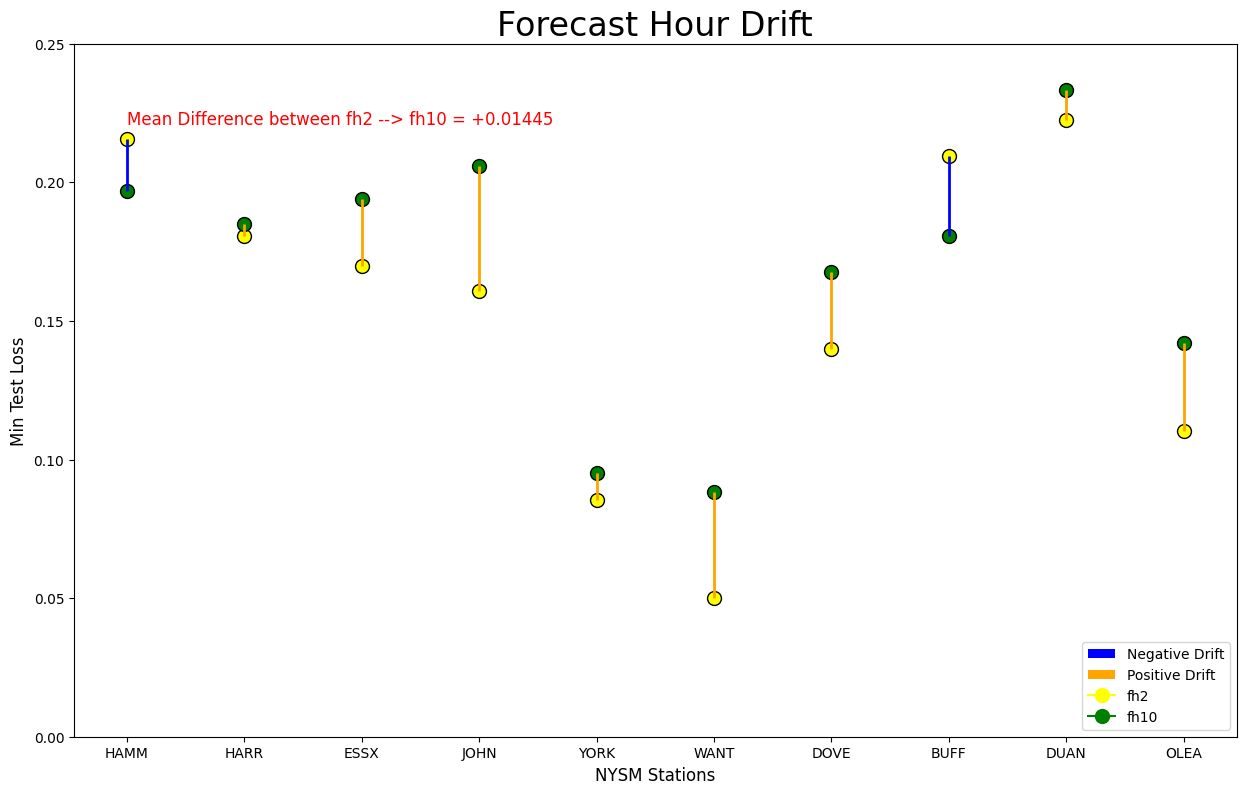

In [18]:
fig, ax = plt.subplots(figsize=(15,9))
ax.set_title('Forecast Hour Drift', fontsize=24)
ax.set_xlabel('NYSM Stations', fontsize = 12)
ax.set_ylabel('Min Test Loss',fontsize = 12)
means2 = st.mean(plot_df['diff_2'])
means2 = round(means2, 5)
ax.set_ylim(top=0.25)
plt.text(0,0.221,f'Mean Difference between fh2 --> fh10 = +{means2*-1}', color = 'red', fontsize=12)
for i,_ in enumerate(plot_df['station']):
    plt.scatter(plot_df['station'].iloc[i], plot_df['fh2'].iloc[i], color = 'yellow', s=100, edgecolor='black', label = 'fh2')
    plt.scatter(plot_df['station'].iloc[i], plot_df['fh10'].iloc[i], color = 'green', s=100, edgecolor='black', label = 'fh10')

    minimum = min(plot_df['fh2'].iloc[i],plot_df['fh10'].iloc[i])
    maximum = max(plot_df['fh2'].iloc[i],plot_df['fh10'].iloc[i])
    plt.vlines(x=plot_df['station'].iloc[i], ymin=minimum, ymax = maximum, linewidth=2, color=plot_df['color_2'].iloc[i])

legend_elements = [Patch(facecolor='blue', label='Negative Drift'),
Patch(facecolor='orange', label='Positive Drift'),
Line2D([0], [0], marker='o', color='yellow',label='fh2', markersize=10),
Line2D([0], [0], marker='o', color='green',label='fh10', markersize=10)]
ax.legend(handles=legend_elements, loc='lower right')
plt.show()